In [1]:
import cv2
import os
import easyocr


In [2]:
import re
def extract_city_and_progress(text):
    try:
        city = re.findall(r'[^\d]+', text)[0].strip()
        progress = re.findall(r'\d+/\d+', text)[0]
        p_list = progress.split('/')
        current = int(p_list[0])
        total = int(p_list[1]) 
        return (city, current, total)
    except:
        print(f'extract_city_and_progress error: {text}')
        return None

In [ ]:
!ls ~/Downloads/*.mp4

/Users/sroot/Downloads/monopolygo_large.mp4
/Users/sroot/Downloads/videoplayback.mp4


In [3]:
video = cv2.VideoCapture('./monopolygo_large.mp4')
max_image = 200
i = 0
j = 0
while video.isOpened():
    # 读取视频的下一帧
    ret, frame = video.read()
    if not ret:
        break
    j += 1
    # 在这里处理帧，例如进行图像识别或其他分析
    
    # 显示帧
    cv2.imshow('Frame', frame)
    if (j%1000==0):
        i+=1
        cv2.imwrite('/Users/sroot/Workspace/project/data_extract_video/frames/frame'+str(i)+'.jpg', frame)
    if i == max_image:
        break

# 释放视频对象和窗口
video.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt


In [8]:
import numpy as np

# 读取图像
img = cv2.imread('./frames/frame100.jpg')

# 定义锐化核
sharpening_kernel = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# 应用锐化核
sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)

In [9]:
%matplotlib inline

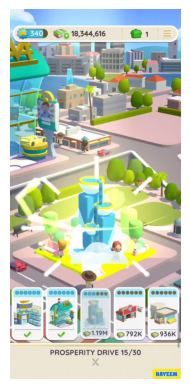

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 使用Matplotlib显示图像
plt.imshow(img_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

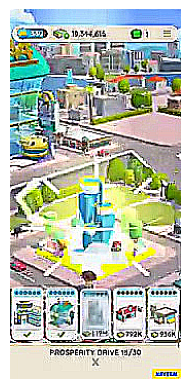

In [ ]:
sharpened_img_1 = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
# 使用Matplotlib显示图像
plt.imshow(sharpened_img_1)
plt.axis('off')  # 不显示坐标轴
plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 539 at [[66, 70], [118, 70], [118, 100], [66, 100]] with confidence: 0.9752902388572693
Detected text: 11,210,608 at [[208, 70], [334, 70], [334, 102], [208, 102]] with confidence: 0.5634248622993138
Detected text: 2 at [[465, 77], [481, 77], [481, 99], [465, 99]] with confidence: 1.0
Detected text: 1.44M at [[40, 1110], [108, 1110], [108, 1134], [40, 1134]] with confidence: 0.9005793734955753
Detected text: 805k at [[160, 1110], [224, 1110], [224, 1136], [160, 1136]] with confidence: 0.9461978077888489
Detected text: 1.04M at [[274, 1110], [344, 1110], [344, 1136], [274, 1136]] with confidence: 0.6374978146822129
Detected text: 1.27M at [[392, 1110], [460, 1110], [460, 1136], [392, 1136]] with confidence: 0.9396007779142219
Detected text: 1.5M at [[516, 1110], [572, 1110], [572, 1136], [516, 1136]] with confidence: 0.8705714344978333
Detected text: ATLANTIS 3/30 at [[200, 1174], [394, 1174], [394, 1204], [200, 1204]] with confidence: 0.9074143191432168
Detected text: NA

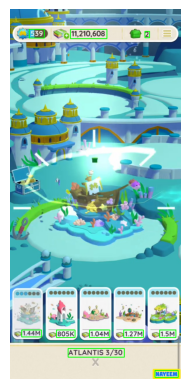

In [11]:

# 创建 OCR reader
reader = easyocr.Reader(['en'])  # 'en' 表示使用英语模式

img_path = './frames/frame128.jpg'
img = cv2.imread(img_path)

# 从图像中读取文本
result = reader.readtext(img_path)

# 打印结果
for (bbox, text, prob) in result:
    print(f'Detected text: {text} at {bbox} with confidence: {prob}')
    points = bbox
    
    # 用多边形标注文本区域
    points = [(int(point[0]), int(point[1])) for point in points]
    cv2.polylines(img, [np.array(points)], isClosed=True, color=(0, 255, 0), thickness=2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [12]:
def is_inside(box1, box2):
    """
    检查 box1 是否在 box2 内部。
    
    参数:
        box1, box2: 由四个 (x, y) 坐标点组成的列表。
    
    返回:
        bool: 如果 box1 在 box2 内部，则返回 True，否则返回 False。
    """
    def is_point_inside_box(point, box):
        """
        检查一个点是否在一个矩形框内部。
        """
        x, y = point
        x1, y1 = box[0]
        x2, y2 = box[2]
        return x1 < x < x2 and y1 < y < y2
    
    # 检查 box1 的所有点是否在 box2 内部
    return all(is_point_inside_box(point, box2) for point in box1)


In [13]:
def convert_abbreviation_to_number(s):
    """
    将包含 'K' 或 'M' 的字符串转换为相应的数值。
    
    参数:
        s (str): 需要转换的字符串，例如 '1.5M' 或 '75.5K'。
    
    返回:
        float: 转换后的数值。
    """
    try:
        s = s.upper()
        # 检查 'M' 并将其转换为百万
        if 'M' in s:
            return int(float(s.replace('M', '')) * 1000000)
        
        # 检查 'K' 并将其转换为千
        elif 'K' in s:
            return int(float(s.replace('K', '')) * 1000)
        
        # 如果没有 'K' 或 'M'，直接转换为 int
        else:
            return int(s)
    except:
        print(f'convert_abbreviation_to_number error: {s}')
        return None

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 648K and 648000 at 2 with prob: 0.4478246330685286
Detected text: 792k and 792000 at 3 with prob: 0.832018256187439
Detected text: 936k and 936000 at 4 with prob: 0.8994361162185669
Detected text: city: PROSPERITY DRIVE and 7/30


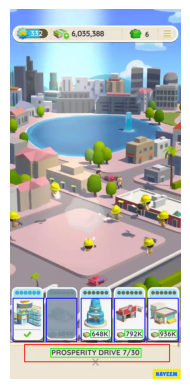

In [15]:

# 创建 OCR reader
reader = easyocr.Reader(['en'])  # 'en' 表示使用英语模式

img_path = './frames/frame99.jpg'
img = cv2.imread(img_path)

area_map = {
    0:[[10, 1000], [115, 1000], [115, 1150], [10, 1150]],
    1:[[125, 1000], [230, 1000], [230, 1150], [125, 1150]],
    2:[[245, 1000], [350, 1000], [350, 1150], [245, 1150]],
    3:[[360, 1000], [465, 1000], [465, 1150], [360, 1150]],
    4:[[475, 1000], [580, 1000], [580, 1150], [475, 1150]]
}
city_area = [[50, 1160], [550, 1160], [550, 1220], [50, 1220]]

# 从图像中读取文本
result = reader.readtext(img)

# 打印结果
for (bbox, text, prob) in result:
    if prob < 0.2:
        continue
    for key, area in area_map.items():
        if is_inside(bbox, area):
            number = convert_abbreviation_to_number(text)
            print(f'Detected text: {text} and {number} at {key} with prob: {prob}')
            points = bbox

            # 用多边形标注文本区域
            points = [(int(point[0]), int(point[1])) for point in points]
            cv2.polylines(img, [np.array(points)], isClosed=True, color=(0, 255, 0), thickness=2)
            break
    if is_inside(bbox, city_area):
        city, current, total = extract_city_and_progress(text)
        print(f'Detected text: city: {city} and {current}/{total}')
        points = bbox

        # 用多边形标注文本区域
        points = [(int(point[0]), int(point[1])) for point in points]
        cv2.polylines(img, [np.array(points)], isClosed=True, color=(0, 255, 0), thickness=2)
        break

for key in area_map:
    area = area_map[key]
    cv2.polylines(img, [np.array(area)], isClosed=True, color=(255, 0, 0), thickness=2)

cv2.polylines(img, [np.array(city_area)], isClosed=True, color=(0, 0, 255), thickness=2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [16]:
video = cv2.VideoCapture('./monopolygo_large.mp4')
fps = video.get(cv2.CAP_PROP_FPS)
# 释放视频对象
video.release()

print(f"The video has a frame rate of {fps} frames per second.")

The video has a frame rate of 30.0 frames per second.


分类器部分

In [18]:
from fastai.vision.all import *

In [22]:
path = "./frames"
files = get_image_files(path)

In [20]:
positive_file_id_set = set(
    ['frame18.jpg','frame29.jpg','frame35.jpg','frame59.jpg','frame60.jpg','frame61.jpg','frame62.jpg','frame65.jpg','frame66.jpg','frame67.jpg','frame69.jpg','frame70.jpg','frame71.jpg','frame72.jpg','frame74.jpg','frame75.jpg','frame76.jpg','frame79.jpg','frame80.jpg','frame81.jpg','frame82.jpg','frame84.jpg','frame85.jpg','frame90.jpg','frame91.jpg','frame95.jpg','frame96.jpg','frame99.jpg','frame100.jpg','frame104.jpg','frame105.jpg','frame106.jpg','frame108.jpg','frame109.jpg','frame110.jpg','frame111.jpg','frame113.jpg','frame114.jpg','frame115.jpg','frame116.jpg','frame119.jpg','frame120.jpg','frame121.jpg','frame124.jpg','frame125.jpg','frame126.jpg','frame128.jpg','frame129.jpg','frame130.jpg','frame133.jpg','frame134.jpg','frame136.jpg']
)
def label_func(f): return f in positive_file_id_set

In [21]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

TypeError: 'NoneType' object is not iterable

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: The MPS backend is supported on MacOS 12.3+.Current OS version can be queried using `sw_vers`

In [ ]:
img_path = '/Users/sroot/Workspace/project/data_extract_video/frames/frame29.jpg'
img = cv2.imread(img_path)

Text(0.5, 1.0, 'Resized Image')

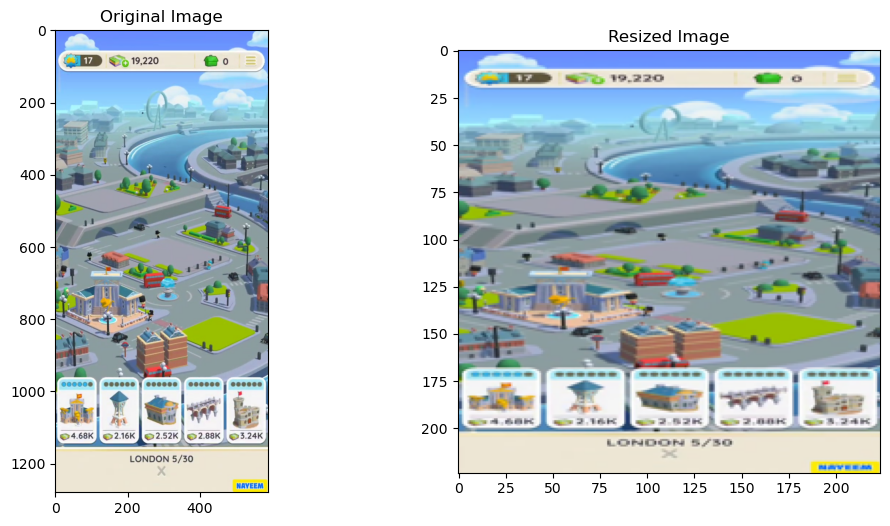

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 打开图像
img = Image.open(img_path)

# 调整大小
resized_img = img.resize((224, 224))

# 使用 matplotlib 显示原始和变换后的图像
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(resized_img)
axs[1].set_title('Resized Image')

In [ ]:
import cv2
import numpy as np

# 加载图像
img = cv2.imread('/Users/sroot/Workspace/project/data_extract_video/frames/frame99.jpg', cv2.IMREAD_UNCHANGED)

# 预处理
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 找轮廓
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 2)

# 计数
count = 0
for cnt in contours:
    # 在这里添加你的形状分析代码
    # 例如，你可以使用cv2.contourArea来获取轮廓的面积，并根据面积大小决定是否计数
    if cv2.contourArea(cnt) > 50:
        # print(f'Found shape with area {cv2.contourArea(cnt)}')
        count += 1

# 结果输出
print(f"Found {count} shapes in the image.")
# 显示图像
plt.imshow(img)
plt.axis('off')
plt.show()

Found 192 shapes in the image.


NameError: name 'plt' is not defined